<a href="https://colab.research.google.com/github/shinnew9/cse347-cse447RL/blob/main/lab1_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [ ]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0
std_upper = 3
# able to get higher rewards even with the lower value

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

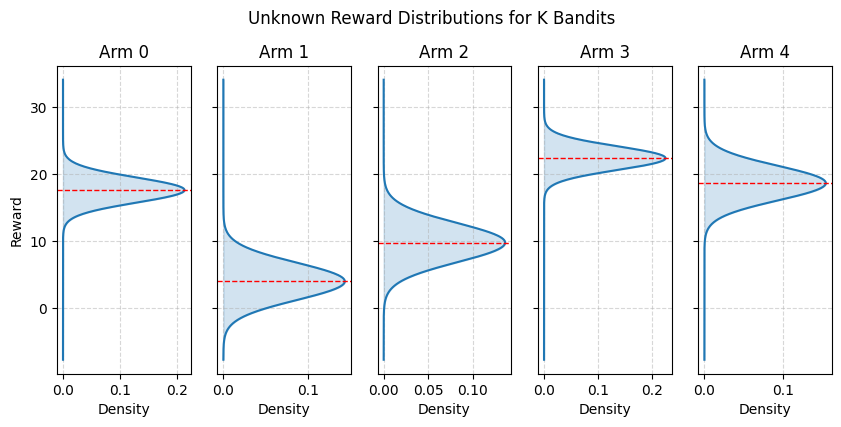

In [ ]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

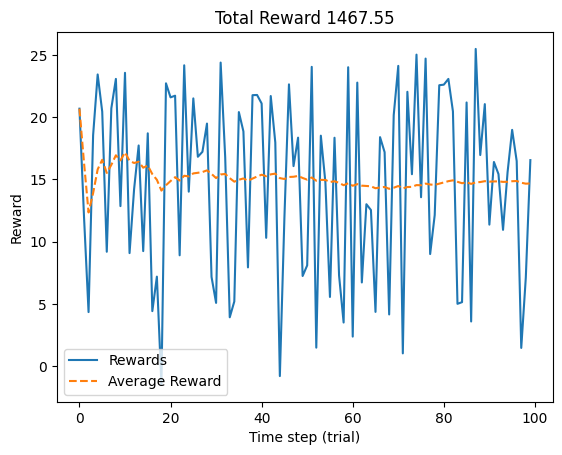

In [ ]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

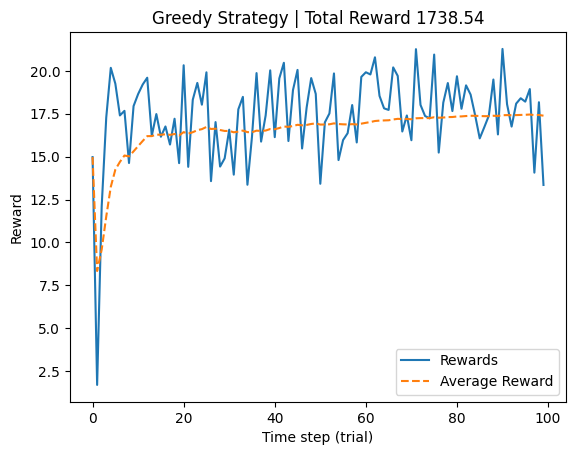

In [ ]:
# Rewards
rewards = []
counts = np.zeros(K, dtype = int)
est_mean = np.zeros(K, dtype=float)

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  # a = 0 ############################ YOUR POLICY HERE #################
  if a in counts:
    # Trying on unchoosen arm
    a = np.where(counts == 0)[0][0]
  else:
    ### Greedy: Choosing the
    max_val = np.max(est_mean)
    candidates = np.where(est_mean == max_val)[0]
    a = np.random.choice(candidates)

  ### Observing Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)

  ### Updating weights ()
  counts[a] += 1
  est_mean[a] += (r-est_mean[0]/counts[a])

# Calculating the results
rewards = np.array(rewards)
total = rewards.sum()
avg_reward = np.cumsum(rewards) / np.arange(1, T+1)



  # # Reward
  # r = np.random.normal(bandit_mean[a2], bandit_std[a2])
  # rewards.append(r)


# # Total reward
# total = sum(rewards)
# avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plt.plot(rewards, label='Rewards')
plt.plot(avg_reward, '--', label='Average Reward')
plt.legend()
plt.title(f"Greedy Strategy | Total Reward {total:.2f}")
plt.xlabel("Time step (trial)")
plt.ylabel("Reward")
plt.show()

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



### 1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

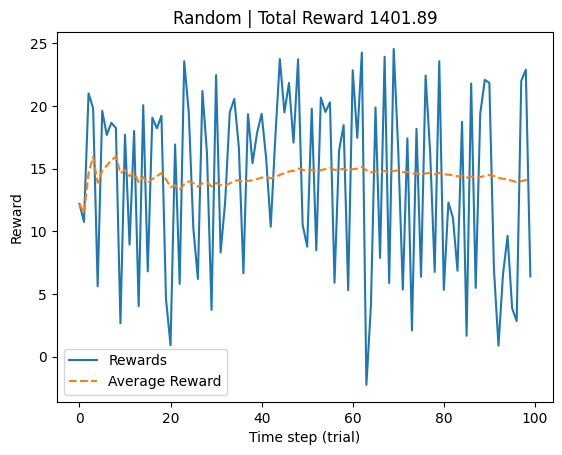

In [ ]:
# Greedy V0 - baseline
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(1)  # 재현성

# bandit_mean, bandit_std, T는 이미 정의돼 있다고 가정
K = len(bandit_mean)

# Random Policy
# At each step, just pick a random arm.

rewards = []
choices = []


for t in range(T):
  # This will give me a baseline performance (usually quite poor).
  a = rng.integers(0, K)
  r = rng.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)
  choices.append(a)

rewards = np.array(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, T+1)

plt.figure()
plt.plot(rewards, label='Rewards')
plt.plot(avg_reward, '--', label='Average Reward')
plt.legend()
plt.title(f"Random | Total Reward {rewards.sum():.2f}")
plt.xlabel("Time step (trial)")
plt.ylabel("Reward")
plt.show()

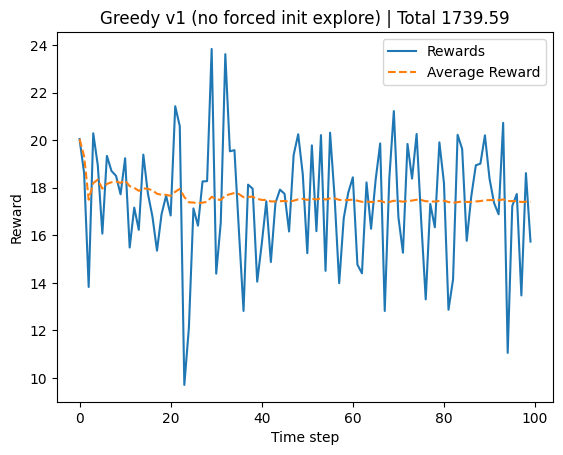

In [ ]:
# Gredy V1 (Naive Greedy, no initial exploration)

# Keep estimated averages for each arm (initialized to 0).
# At each step:
#   - select the arm with the highest current estimated average.
#   - if multiple arms tie, break ties randomly.
# Problem: since all estimates start at 0,
#   the first few random rewards can bias the algorithm to "lock in"
rng = np.random.default_rng(1)

K = len(bandit_mean)
rewards = []
choices = []

#
est_mean = np.zeros(K, dtype=float)
counts = np.zeros(K, dtype=int)

for t in range(T):
  max_val = np.max(est_mean)
  candidates = np.where(est_mean == max_val)[0]
  a = rng.choice(candidates)

  # Reward observing
  r = rng.normal(bandit_mean[0], bandit_std[a])

  #
  counts[a] += 1
  est_mean[a] += (r - est_mean[a])/counts[a]

  rewards.append(r)
  choices.append(a)

rewards = np.array(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, T+1)

plt.figure()
plt.plot(rewards, label='Rewards')
plt.plot(avg_reward, '--', label='Average Reward')
plt.legend()
plt.title(f"Greedy v1 (no forced init explore) | Total {rewards.sum():.2f}")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.show()

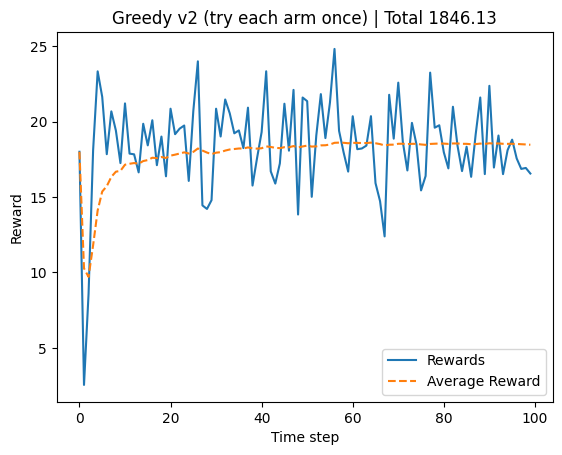

Final est_mean: [17.99503153  2.54647775  8.57820839 18.09514469 18.73872066]
Counts: [ 1  1  1  1 96]


In [ ]:
# Greedy V2 - Trying on each arm once
import numpy as np
import matplotlib.pyplot as plt
import builtins

rng = np.random.default_rng(2)

# --- sanitize & derive K ---
bandit_mean = np.asarray(bandit_mean, dtype=float).ravel()
bandit_std  = np.asarray(bandit_std,  dtype=float).ravel()
K = bandit_mean.size
assert bandit_std.size == K, "bandit_std length must match bandit_mean"

rewards = []
choices = []

est_mean = np.zeros(K, dtype=float)
counts   = np.zeros(K, dtype=int)

# 1) Force each arm once
init_pulls = builtins.min(int(K), int(T))   # <- use builtins.min, not np.min
for a in range(init_pulls):
    r = rng.normal(bandit_mean[a], bandit_std[a])
    counts[a] += 1
    est_mean[a] = r
    rewards.append(r)
    choices.append(a)

# 2) Pure greedy afterwards
for t in range(init_pulls, int(T)):
    max_val = np.max(est_mean)
    candidates = np.where(est_mean == max_val)[0]
    a = rng.choice(candidates)

    r = rng.normal(bandit_mean[a], bandit_std[a])
    counts[a] += 1
    est_mean[a] += (r - est_mean[a]) / counts[a]

    rewards.append(r)
    choices.append(a)

rewards = np.array(rewards, dtype=float)
avg_reward = np.cumsum(rewards) / np.arange(1, rewards.size + 1)

plt.figure()
plt.plot(rewards, label='Rewards')
plt.plot(avg_reward, '--', label='Average Reward')
plt.legend()
plt.title(f"Greedy v2 (try each arm once) | Total {rewards.sum():.2f}")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.show()

print("Final est_mean:", est_mean)
print("Counts:", counts)


### 2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

In [ ]:
epsilon = 0.1  # or 0.001 etc.
rewards = []
counts = np.zeros(K, dtype=int)
est_mean = np.zeros(K, dtype=float)

for t in range(T):
  # --- Action selection ---
  if np.random.random() < epsilon:
    # Exploration: pick a random arm
    a = np.random.randint(0, K)
  else:
    # Exploitation: pick the greedy arm
    max_val = np.max(est_mean)
    candidates = np.where(est_mean == max_val)[0]
    a = np.random.choice(candidates)

    # --- Resard observation ---
    r = np.random.normal(bandit_mean[0], bandit_std[a])
    rewards.append(r)

    # --- Update estimates ---
    counts[a] += 1
    est_mean[a] += (r-est_mean[a]) / counts[a]

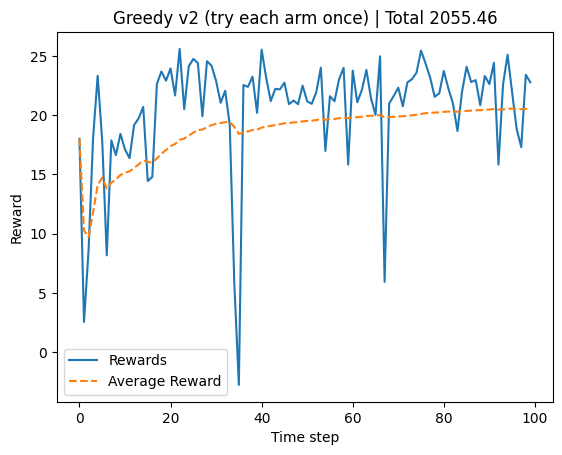

Final est_mean: [17.04197991  2.87715621 11.24172409 22.44352693 18.09914878]
Counts: [ 3  4  3 76 14]


In [ ]:
# Applying epsilon on Greedy V2
import numpy as np
import matplotlib.pyplot as plt
import builtins

rng = np.random.default_rng(2)

# Assume these exist already:
# bandit_mean, bandit_std: shape (K,)
# T: int
bandit_mean = np.asarray(bandit_mean, dtype=float).ravel()
bandit_std  = np.asarray(bandit_std,  dtype=float).ravel()
K = bandit_mean.size
# assert bandit_std.size == K, "bandit_std length must match bandit_mean"

epsilon = 0.1

rewards = []
choices = []

est_mean = np.zeros(K, dtype=float)
counts = np.zeros(K, dtype=int)

# 1) Force each arm once
init_pulls = builtins.min(int(K), int(T))   # <- use builtins.min, not np.min
for a in range(init_pulls):
    r = rng.normal(bandit_mean[a], bandit_std[a])
    counts[a] += 1
    est_mean[a] = r
    rewards.append(r)
    choices.append(a)

# 2) Pure greedy afterwards
for t in range(init_pulls, int(T)):
    # --- Action selection ----
    if rng.random() < epsilon:
       # Exploration: pick any arm uniformly at random
       a = rng.integers(0, K)
    else:
      # Exploitation: pick the greedy arm (tie-borken randomly)
      max_val = np.max(est_mean)
      candidates = np.where(est_mean == max_val)[0]
      a = rng.choice(candidates)
    # ε

    # --- Reward observation ---
    r = rng.normal(bandit_mean[a], bandit_std[a])

    # --- Incremental mean update ---
    counts[a] += 1
    est_mean[a] += (r - est_mean[a]) / counts[a]

    rewards.append(r)
    choices.append(a)

# Results & plot (same style as before)
rewards = np.array(rewards, dtype=float)
avg_reward = np.cumsum(rewards) / np.arange(1, rewards.size + 1)

plt.figure()
plt.plot(rewards, label='Rewards')
plt.plot(avg_reward, '--', label='Average Reward')
plt.legend()
plt.title(f"Greedy v2 (try each arm once) | Total {rewards.sum():.2f}")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.show()

print("Final est_mean:", est_mean)
print("Counts:", counts)

### 3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(7)

# Assume these exist already:
# bandit_mean, bandit_std (shape: (K, )), T (int)
bandit_mean = np.asarray(bandit_mean, dtype=float).ravel()
bandit_std = np.asarray(bandit_std, dtype=float).ravel()

K = bandit_mean.size
assert bandit_std.size == K, "bandit_std length must match bandit_mean"

# --- Thompson Sampling (Gaussian, known variacne) ---
# Prior: μ_a ~ Normal(mu0, var0) independently for each arm a

mu0 = 0.0
var0 = 1e6  # very uninformative prior

post_mean = np.full(K, mu0, dtype=float)
post_var = np.full(K, var0, dtype=float)

# For logging / analysis (not required for TS itself)
counts = np.zeros(K, dtype = int)
est_mean = np.zeros(K, dtype=float)  # sample mean for reporting
rewards = []
choices = []



# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1.
- With the ε= 0.1, the agent explores more often. This increases the chance of discovering beter arms early, espeically when initial estimates are poor.
- With ε = 0.001, exploration is very rare, so the algorithm quickly exploits what it thinks is best - but it might miss better options.
- Advantage of larger ε: faster correction if the agent gets stuck on a suboptimal arm, better adaptation when uncertaintly is high.

2.
- A purely greedy strategy is **not effective** in this case.
- Once it settles on an arm, it rarely switches, so it cannot adapt whaen the best arm changes.
- Strategies with ongoing exploration (ε-greedy with nonzero ε, or methods with decaying windows) are more effective because they keep testing alternatives.

3.
- Larger ε -> more exploration, slower convergence, but mroe robust to nonstationary environments.
- Smaller ε -> less exploration, faster exploitation of the current best arm, but higher risk of premature convergence.
- In the long run, ε controls the trade-off: exploration prevents lock-in, exploitation maximizes cumulative reward once the environment is well understood.

4.
- With many arms, random exploration (ε fraction of steps) becomes inefficient:
the chance of picking a truly good arm by random exploration decreases.
- The algorithm may waste many trials on poor arms.
- Possible solutions:
  - Use decaying ε (more exploration early, less later),
  - Use smarter exloration methods (e.g., UCB Thompson sampling) that prioritize promising arms.
